<a href="https://www.kaggle.com/code/notsau/tensorflow-with-fashion-mnist-data?scriptVersionId=161450697" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

# EDA

In [2]:
train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")

# Feature Engineering

In [15]:
train_images = train.drop("label", axis=1).values
train_labels = train["label"].values

test_images = test.drop("label", axis=1).values
test_labels = test["label"].values

train_images=train_images/255.0
test_images=test_images/255.0

In [19]:
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
test_images = test_images.astype("float32")
train_images = train_images.astype("float32")

# Modelling

In [21]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = "relu", input_shape =(784,)),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")])
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, batch_size = 120, epochs=40, verbose = 1, validation_data = (test_images, test_labels))










Epoch 1/40







500/500 [==============================] - 2s 2ms/step - loss: 0.5803 - accuracy: 0.7995 - val_loss: 0.4397 - val_accuracy: 0.8437

Epoch 2/40

500/500 [==============================] - 1s 2ms/step - loss: 0.4015 - accuracy: 0.8569 - val_loss: 0.3741 - val_accuracy: 0.8677

Epoch 3/40

500/500 [==============================] - 1s 2ms/step - loss: 0.3658 - accuracy: 0.8685 - val_loss: 0.3843 - val_accuracy: 0.8607

Epoch 4/40

500/500 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8776 - val_loss: 0.3535 - val_accuracy: 0.8722

Epoch 5/40

500/500 [==============================] - 1s 2ms/step - loss: 0.3210 - accuracy: 0.8832 - val_loss: 0.3461 - val_accuracy: 0.8722

Epoch 6/40

500/500 [==============================] - 1s 2ms/step - loss: 0.3085 - accuracy: 0.8888 - val_loss: 0.3210 - val_accuracy: 0.8827

Epoch 7/40

500/500 [==============================] - 1s 2ms/step - loss: 0.2927 - accuracy: 0.8921 - val_loss: 0.3318 -

In [22]:
_, accuracy=model.evaluate(test_images, test_labels)
print("Accuracy =  %2f" % (accuracy*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.8905

Accuracy =  89.050001


In [23]:
import matplotlib.pyplot as plt

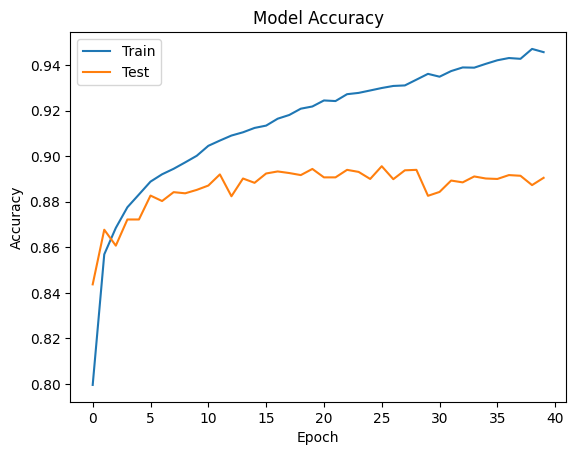

In [24]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()